In [1]:
import sys
sys.path.insert(0, "../")

import math
import matgraph as mg
import torch
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

[juliapkg] Locating Julia ^1.6
[juliapkg] Using Julia 1.7.2 at /home/ubuntu/Julia/julia-1.7.2/bin/julia
[juliapkg] Using Julia project at /mnt/disks/data/Repositories/FAST-ASR/matgraph/matgraphenv/julia_env
[juliapkg] Installing packages:
           julia> import Pkg
           julia> Pkg.add([Pkg.PackageSpec(name="PythonCall", uuid="6099a3de-0909-46bc-b1f4-468b9a2dfc0d"), Pkg.PackageSpec(name="CUDA", uuid="052768ef-5323-5732-b1bb-66c8b64840ba"), Pkg.PackageSpec(name="DLPack", uuid="53c2dc0f-f7d5-43fd-8906-6c0220547083"), Pkg.PackageSpec(name="MarkovModels", uuid="c2ae6250-d0a1-11ea-0991-234599ce5244", url=raw"https://github.com/FAST-ASR/MarkovModels.jl.git", rev=raw"uniqfsm"), Pkg.PackageSpec(name="Semirings", uuid="900aad66-9ca5-44d4-b043-321c62cb7767", rev=raw"main"), Pkg.PackageSpec(name="Adapt", uuid="79e6a3ab-5dfb-504d-930d-738a2a938a0e")])
           julia> Pkg.resolve()


    Updating git-repo `https://github.com/FAST-ASR/MarkovModels.jl.git`
    Updating git-repo `https://github.com/FAST-ASR/Semirings.jl.git`
    Updating registry at `~/.julia-1.7.2/registries/General.toml`
   Resolving package versions...
    Updating `/mnt/disks/data/Repositories/FAST-ASR/matgraph/matgraphenv/julia_env/Project.toml`
  [c2ae6250] ~ MarkovModels v0.10.0 `https://github.com/FAST-ASR/MarkovModels.jl.git#uniqfsm` ⇒ v0.10.0 `https://github.com/FAST-ASR/MarkovModels.jl.git#uniqfsm`
    Updating `/mnt/disks/data/Repositories/FAST-ASR/matgraph/matgraphenv/julia_env/Manifest.toml`
  [c2ae6250] ~ MarkovModels v0.10.0 `https://github.com/FAST-ASR/MarkovModels.jl.git#uniqfsm` ⇒ v0.10.0 `https://github.com/FAST-ASR/MarkovModels.jl.git#uniqfsm`
Precompiling project...
  ✓ MarkovModels
  1 dependency successfully precompiled in 7 seconds (157 already precompiled)
  No Changes to `/mnt/disks/data/Repositories/FAST-ASR/matgraph/matgraphenv/julia_env/Project.toml`
  No Changes to `/mnt

In [3]:
fsm = mg.FSM.from_files(
    "/home/ubuntu/Exps/lfmmi2/sup_s03_lm3/denominator.fsm",
    "/home/ubuntu/Exps/lfmmi2/sup_s03_lm3/denominator.smap"
)
seqlengths = [83, 83]

X = torch.randn(2, seqlengths[1], 96).cuda()

In [4]:
bfsm = mg.BatchFSM.from_list([fsm, fsm])
bfsm = bfsm.cuda()

In [ ]:
Z, ttl = mg.pdfposteriors(bfsm, X, seqlengths)

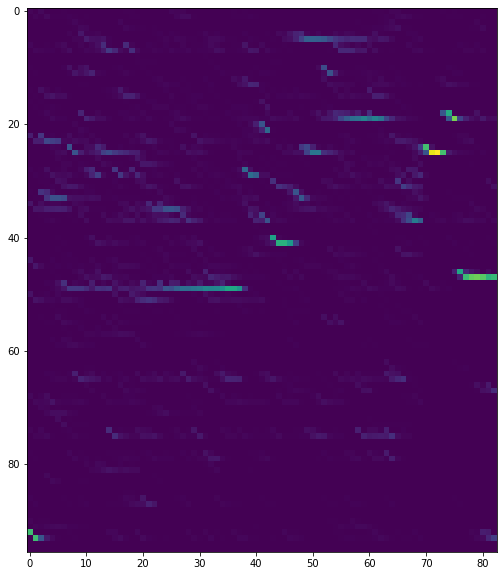

In [39]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (20, 10)
plt.imshow(Z.cpu().numpy()[1].T, cmap='viridis', interpolation='nearest')
plt.show()